In [1]:
import sys, os
if 'google.colab' in sys.modules:
      if os.getcwd() == '/content':
        !git clone 'https://github.com/pgruening/em_football.git'
        !pip install git+https://github.com/pgruening/dlbio
        !pip install mdutils
        os.chdir('em_football')

In [2]:
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
import torch
from dataset.ds_qualification import get_one_hot
from DLBio.helpers import load_json
from DLBio.pytorch_helpers import get_device
from game_plan_api import get_winner, run
from helpers import load_model
from tqdm import tqdm

In [3]:
PATH = 'used_model'


class MyModel():
    def __init__(self, max_lk):
        device = 'cpu'
        options = load_json(join(PATH, 'opt.json'))
        device = get_device()
        model = load_model(
            options, device, new_model_path=join(PATH, 'model.pt'),
            map_location=torch.device(device)
        )
        to_one_hot = get_one_hot()
        model.to_one_hot = to_one_hot
        model.d = device
        self.model = model
        self.max_lk = max_lk

    def __call__(self, team_1, team_2, no_draws=False):
        with torch.no_grad():
            out = self.model.predict(
                team_1, team_2, no_draws=no_draws, max_lk=self.max_lk)
        return out


In [4]:
def main(path='my_results.md'):
    model = MyModel(True)
    group_tables, all_games = run(model, path=path)
    return group_tables, all_games

def winner_dist(path='my_winner_dist.png'):
    model = MyModel(False)
    winners_ = []
    for _ in tqdm(range(100)):
        winner = get_winner(model)
        winners_.append(winner)

    plt.hist(np.array(winners_))
    plt.show()


In [5]:
def main(path='my_results.md'):
    model = MyModel(True)
    group_tables, all_games = run(model, path=path)
    return group_tables, all_games


In [6]:
group_tables, all_games = main()

Created file: my_results.md
Winner: England


In [13]:
for gt in group_tables.values():
    display(gt)

,name,goals,diff,points
0,Italien,6.0,3.0,7.0
1,Schweiz,5.0,2.0,5.0
2,Türkei,2.0,-1.0,2.0
3,Wales,0.0,-4.0,1.0


,name,goals,diff,points
0,Belgien,6.0,3.0,7.0
1,Dänemark,5.0,3.0,7.0
2,Russland,4.0,-2.0,3.0
3,Finnland,2.0,-4.0,0.0


,name,goals,diff,points
0,Niederlande,7.0,3.0,7.0
1,Ukraine,5.0,2.0,5.0
2,Österreich,4.0,0.0,4.0
3,Mazedonien,2.0,-5.0,0.0


,name,goals,diff,points
0,England,10.0,7.0,9.0
1,Tschechien,5.0,0.0,6.0
2,Kroatien,4.0,-2.0,3.0
3,Schottland,3.0,-5.0,0.0


,name,goals,diff,points
0,Spanien,7.0,5.0,9.0
1,Schweden,4.0,1.0,4.0
2,Polen,3.0,-1.0,2.0
3,Slowakei,1.0,-5.0,1.0


,name,goals,diff,points
0,Deutschland,9.0,5.0,7.0
1,Portugal,7.0,4.0,7.0
2,Frankreich,6.0,1.0,3.0
3,Ungarn,0.0,-10.0,0.0


In [8]:
all_games

,team1,team2,result,type
0,Türkei,Italien,1-2,group a
1,Wales,Schweiz,0-2,group a
2,Dänemark,Finnland,2-0,group b
3,Belgien,Russland,3-1,group b
4,England,Kroatien,3-1,group d
5,Österreich,Mazedonien,2-1,group c
6,Niederlande,Ukraine,2-2,group c
7,Schottland,Tschechien,1-2,group d
8,Polen,Slowakei,1-1,group e
9,Spanien,Schweden,2-1,group e


100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


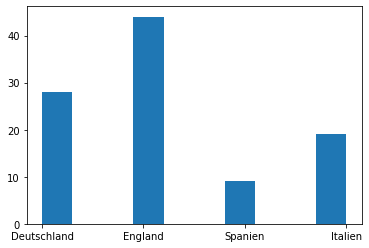

In [9]:
winner_dist()